In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

In [35]:
aprovacao = pd.read_excel('aprovacao_alunos.xlsx')
aprovacao.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [3]:
aprovacao.describe(
    
)

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [5]:
aprovacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<AxesSubplot:xlabel='ano_2015', ylabel='Count'>

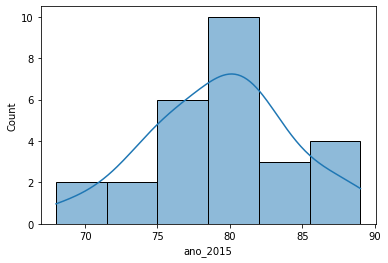

In [7]:
sns.histplot(data=aprovacao, x="ano_2015", kde=True)

<AxesSubplot:xlabel='ano_2016', ylabel='Count'>

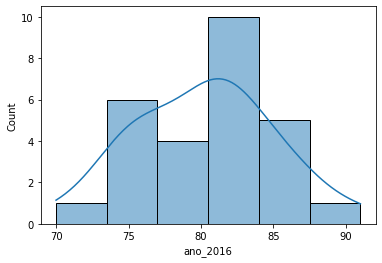

In [8]:
sns.histplot(data=aprovacao, x="ano_2016", kde=True)

<AxesSubplot:xlabel='ano_2015', ylabel='ano_2016'>

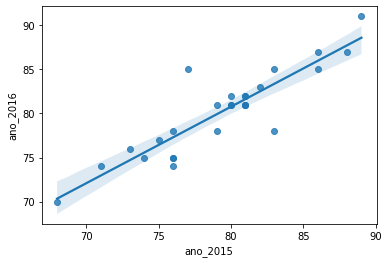

In [9]:
sns.regplot(x="ano_2015", y="ano_2016", data=aprovacao)

In [10]:
aprovacao.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [36]:
aprovacao_cop = aprovacao

In [37]:
scaler = MinMaxScaler()
aprovacao_cop[['ano_2015', 'ano_2016']] = scaler.fit_transform(aprovacao_cop[['ano_2015', 'ano_2016']])
aprovacao_normalized = pd.DataFrame(scaler.fit_transform(aprovacao),  columns=aprovacao.columns, index=aprovacao.index)
aprovacao_normalized.head()



,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [18]:
aprovacao_cop.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [22]:
formula = ('ano_2016 ~ ano_2015 -1')
modelo = smf.ols(formula, data=aprovacao_cop).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Fri, 19 May 2023   Prob (F-statistic):                    2.21e-20
Time:                        16:14:35   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ano_2015       0.8939      0.034     26.593      0.000       0.825       0.963
==============================================================================
Omnibus:                        9.100   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.916
Skew:                           0.490   Prob(JB):                      0.00157
Kurtosis:                       6.243   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x = aprovacao_normalized [['ano_2015']]
y = aprovacao_normalized [['ano_2016']]
x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)


In [49]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
LinearRegression()
r2 = regressor.score(x_train, y_train)
r2

0.8800910056640281

In [46]:
y_pred_trainer = regressor.predict(x_train)
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_trainer))
print('R2: ', metrics.r2_score(y_train, y_pred_trainer))
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_trainer))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_trainer)))

MSE:  0.006947385853516443
R2:  0.8800910056640281
MAE:  0.06313092719197842
RMSE:  0.08335097991935334


In [47]:
lr = LinearRegression()
lr.fit(x_teste, y_teste)
y_pred_teste = lr.predict(x_teste)
print('MSE: ', metrics.mean_squared_error(y_teste, y_pred_teste))
print('R2: ', metrics.r2_score(y_teste, y_pred_teste))
print('MAE: ', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MSE:  0.014620503143970094
R2:  0.3252467793207293
MAE:  0.08998515473335626
RMSE:  0.12091527258361573
